# Importing the required python libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Loading the dataset

In [9]:
df = pd.read_csv('mobile_app_performance_metrics.csv')
df.head()

,date,user_id,device_type,os_version,app_version,country,session_duration,screen_views,crash_occurred,network_latency_ms,battery_drain_percent,memory_usage_mb,fps,api_call_count,error_count
0,01-04-2025,u_56527,Android,Android 12,2.5.0,India,4.28,0,True,171.97,6.58,132.29,60.00,13,2
1,02-04-2025,u_60307,Android,Android 12,2.5.0,Brazil,157.45,1,False,136.84,4.54,145.13,51.18,21,2
2,11-04-2025,u_72980,Tablet,Android 12,2.6.0,Germany,161.34,1,True,104.87,2.86,119.38,60.00,17,5
3,16-04-2025,u_16153,iOS,iOS 17.1,2.6.0,Germany,510.38,5,True,144.49,6.59,141.25,60.00,8,1
4,10-04-2025,u_28660,Tablet,iOS 16.4,2.5.0,Japan,190.59,3,False,183.64,3.60,136.52,43.21,15,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1000 non-null   object 
 1   user_id                1000 non-null   object 
 2   device_type            1000 non-null   object 
 3   os_version             1000 non-null   object 
 4   app_version            1000 non-null   object 
 5   country                1000 non-null   object 
 6   session_duration       1000 non-null   float64
 7   screen_views           1000 non-null   int64  
 8   crash_occurred         1000 non-null   bool   
 9   network_latency_ms     1000 non-null   float64
 10  battery_drain_percent  1000 non-null   float64
 11  memory_usage_mb        1000 non-null   float64
 12  fps                    1000 non-null   float64
 13  api_call_count         1000 non-null   int64  
 14  error_count            1000 non-null   int64  
dtypes: bo

In [11]:
df['crash_occurred'] = df['crash_occurred'].astype(bool)

# Calculate crash rates by device/OS

In [12]:
crash_rates = df.groupby(['device_type','os_version'])['crash_occurred'].mean().sort_values(ascending = False)
print('Top 5 high crash rates:')
display(crash_rates.head().round(2))
print('Top 5 low crash rates:')
display(crash_rates.tail().round(2))

Top 5 high crash rates:


device_type  os_version
Tablet       Android 12    0.32
Android      Android 14    0.30
iOS          iOS 16.4      0.28
             iOS 17.0      0.28
Tablet       iOS 16.4      0.25
Name: crash_occurred, dtype: float64

Top 5 low crash rates:


device_type  os_version
iOS          iOS 17.0      0.28
Tablet       iOS 16.4      0.25
Android      Android 12    0.25
             Android 13    0.24
iOS          iOS 17.1      0.21
Name: crash_occurred, dtype: float64

# FPS Performance Analysis

In [13]:
fps_stats = df.groupby(['device_type','os_version'])['fps'].agg(['mean','median','std'])
print('FPS Performance Statistics:')
display(fps_stats.sort_values('mean',ascending = False).round(2))

FPS Performance Statistics:


mean  median   std
device_type os_version                     
Android     Android 12  53.89   56.04  6.48
Tablet      iOS 16.4    53.50   55.55  6.93
iOS         iOS 17.0    53.32   56.06  7.77
            iOS 17.1    53.30   55.46  7.75
Tablet      Android 12  53.21   54.76  7.01
Android     Android 14  52.71   54.94  8.13
iOS         iOS 16.4    52.44   54.06  8.05
Android     Android 13  51.31   53.12  8.19

# Memory usage analysis

In [14]:
memory_stats = df.groupby(['device_type','os_version'])['memory_usage_mb'].agg(['mean','median'])
print("Memory usage statistics (MB):")
display(memory_stats.sort_values('mean').round(2))

Memory usage statistics (MB):


mean  median
device_type os_version                
iOS         iOS 17.1    127.61  127.67
Tablet      iOS 16.4    127.61  126.76
            Android 12  128.34  129.02
Android     Android 13  128.76  128.62
            Android 14  131.26  133.36
iOS         iOS 16.4    131.91  131.73
            iOS 17.0    132.24  133.70
Android     Android 12  132.51  132.68

# Battery drain analysis

In [15]:
battery_stats = df.groupby(['device_type','os_version'])['battery_drain_percent'].agg(['mean','count'])
print("Battery drain statistics (% per session):")
display(battery_stats.sort_values('mean').round(2))

Battery drain statistics (% per session):


mean  count
device_type os_version             
iOS         iOS 16.4    4.66    116
Android     Android 13  4.82    108
Tablet      Android 12  4.93    186
            iOS 16.4    5.00    169
Android     Android 14  5.06     92
iOS         iOS 17.0    5.14    109
Android     Android 12  5.19    120
iOS         iOS 17.1    5.39    100

# Network Latency Analysis

In [16]:
latency_stats = df.groupby(['device_type','os_version'])['network_latency_ms'].agg(['mean','count'])
print('Network latency statistics(ms):')
display(latency_stats.sort_values('mean').round(2))

Network latency statistics(ms):


mean  count
device_type os_version               
iOS         iOS 16.4    137.35    116
            iOS 17.1    140.41    100
Android     Android 13  141.37    108
iOS         iOS 17.0    141.45    109
Tablet      iOS 16.4    145.14    169
            Android 12  152.28    186
Android     Android 14  155.37     92
            Android 12  155.89    120

# Comprehensive Performance Score

In [17]:
# Creating a composite score combining multiple metrics
def calculate_score(group):
    score = (group['fps'].mean() / 60 +                     
             (1 - group['crash_occurred'].mean()) +         
             (1 / (group['memory_usage_mb'].mean() / 200)) + 
             (1 / (group['battery_drain_percent'].mean() / 10)))
    return score

performance_scores = df.groupby(['device_type', 'os_version']).apply(calculate_score)
performance_scores = performance_scores.sort_values(ascending=False)
print("Overall Performance Scores:")
display(performance_scores)

Overall Performance Scores:


C:\Users\mathr\AppData\Local\Temp\ipykernel_19032\816680951.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  performance_scores = df.groupby(['device_type', 'os_version']).apply(calculate_score)


device_type  os_version
iOS          iOS 16.4      5.253526
Android      Android 13    5.242434
Tablet       iOS 16.4      5.205020
             Android 12    5.156111
iOS          iOS 17.1      5.102415
Android      Android 12    5.084021
             Android 14    5.074063
iOS          iOS 17.0      5.071046
dtype: float64

#  Visualization - Crash Rates

<Figure size 1200x600 with 0 Axes>

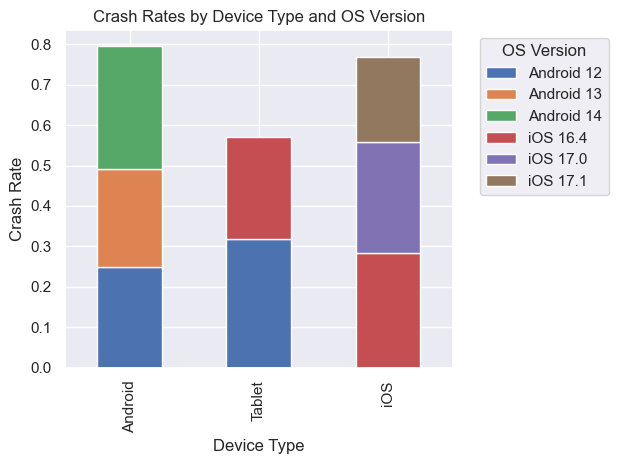

In [18]:
plt.figure(figsize=(12, 6))
crash_rates.unstack().plot(kind='bar', stacked=True)
plt.title('Crash Rates by Device Type and OS Version')
plt.ylabel('Crash Rate')
plt.xlabel('Device Type')
plt.legend(title='OS Version', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Visualization - Performance Heatmap
# Pivot the performance scores for heatmap

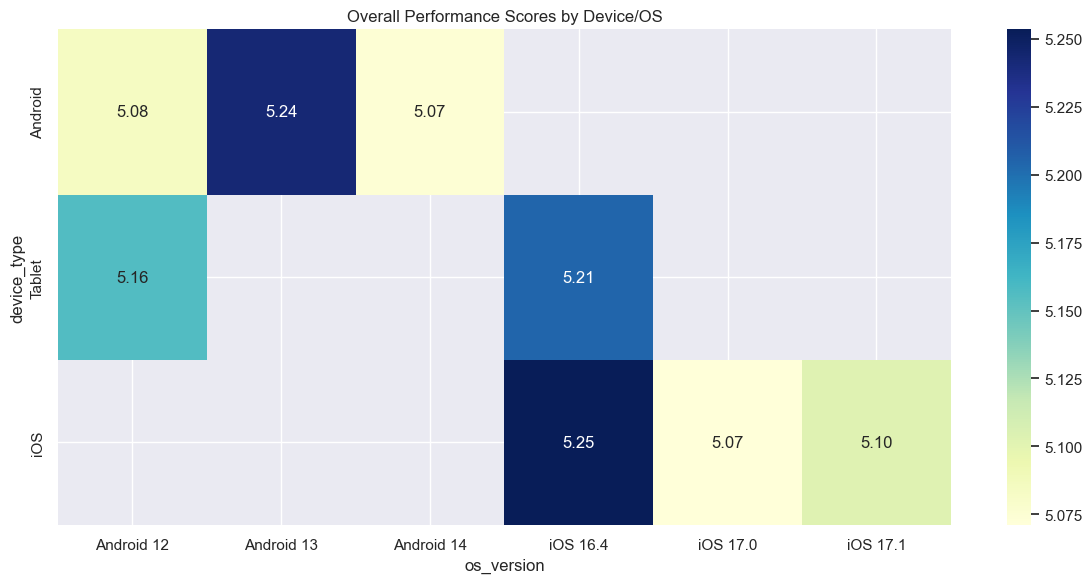

In [19]:
heatmap_data = performance_scores.reset_index()
heatmap_data = heatmap_data.pivot(index='device_type', columns='os_version', values=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Overall Performance Scores by Device/OS')
plt.tight_layout()
plt.show()

In [21]:
df.to_csv('mobile_app_metrics_cleaned_dataset.csv', index=False)